# **THEO CÔNG THỨC TOÁN HỌC**

**Đạo Hàm - Derivative**


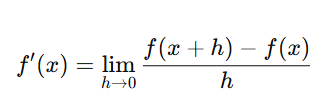


Ta sẽ dùng **giá trị rất nhỏ** của ℎ để xấp xỉ đạo hàm.

In [2]:
# f(x) = x^2

def f(x):
  return x**2

def derivative(f, x, h = 1e-6):
  return (f(x+h) - f(x)) / h

x_val = 3
print("f'(x) tại x = 3 là: ", derivative(f, x_val))

f'(x) tại x = 3 là:  6.000001000927568


**Đạo Hàm Riêng - Partial Derivative**


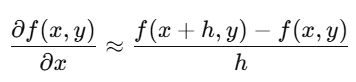


In [5]:
def f(x, y):
    return x**2 * y + y**2

def partial_derivative_x(f, x, y, h=1e-6):
    return (f(x + h, y) - f(x, y)) / h

def partial_derivative_y(f, x, y, h=1e-6):
    return (f(x, y + h) - f(x, y)) / h

# Kiểm tra tại (x, y) = (2, 1)
x_val = 2
y_val = 1

print("∂f/∂x tại (2,1):", partial_derivative_x(f, x_val, y_val))
print("∂f/∂y tại (2,1):", partial_derivative_y(f, x_val, y_val))

∂f/∂x tại (2,1): 4.0000010006480125
∂f/∂y tại (2,1): 6.0000009991512115


# **THEO THƯ VIỆN PYTORCH**

PyTorch có hệ thống **AutoGrad** (Automatic Differentiation) rất mạnh:


*   Tự động tính đạo hàm, đạo hàm riêng, đạo hàm bậc 2,...
*   Có thể dễ dàng vẽ đồ thị đạo hàm, loss, gradient...



In [6]:
# f(x) = x^2

import torch

# Khai báo biến x có yêu cầu đạo hàm (requires_grad=True)
x = torch.tensor(3.0, requires_grad=True)
f = x**2  # Hàm f(x) = x^2

# Tính đạo hàm
f.backward()

print("f(x) = x^2 tại x = 3")
print("Đạo hàm f'(x):", x.grad)

f(x) = x^2 tại x = 3
Đạo hàm f'(x): tensor(6.)


In [7]:
x = torch.tensor(2.0, requires_grad=True)
y = torch.tensor(3.0, requires_grad=True)

# f(x, y) = x^2*y + y^2
f = x**2 * y + y**2

f.backward()

print("∂f/∂x =", x.grad)
print("∂f/∂y =", y.grad)

∂f/∂x = tensor(12.)
∂f/∂y = tensor(10.)


# **BIỂU DIỄN ĐỒ THỊ ĐẠO HÀM BẰNG MATPLOTLIB**

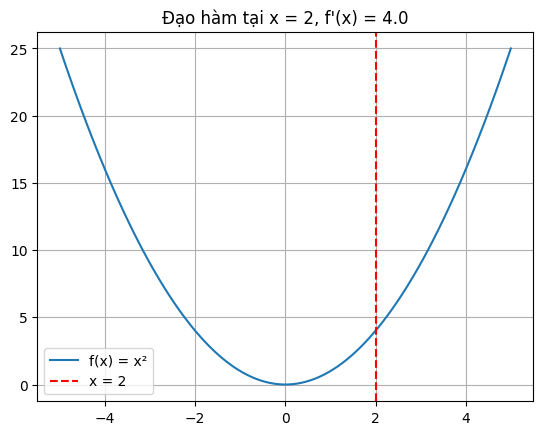

In [9]:
import torch
import matplotlib.pyplot as plt

# Tạo dữ liệu
x_vals = torch.linspace(-5, 5, 100)
y_vals = x_vals**2

# Tính đạo hàm thủ công
x = torch.tensor(2.0, requires_grad=True)
f = x**2
f.backward()
grad_at_2 = x.grad.item()  # đạo hàm tại x = 2

# Vẽ
plt.plot(x_vals, y_vals.detach(), label="f(x) = x²")
plt.axvline(x=2, color='r', linestyle='--', label="x = 2")
plt.title("Đạo hàm tại x = 2, f'(x) = {:.1f}".format(grad_at_2))
plt.legend()
plt.grid(True)
plt.show()

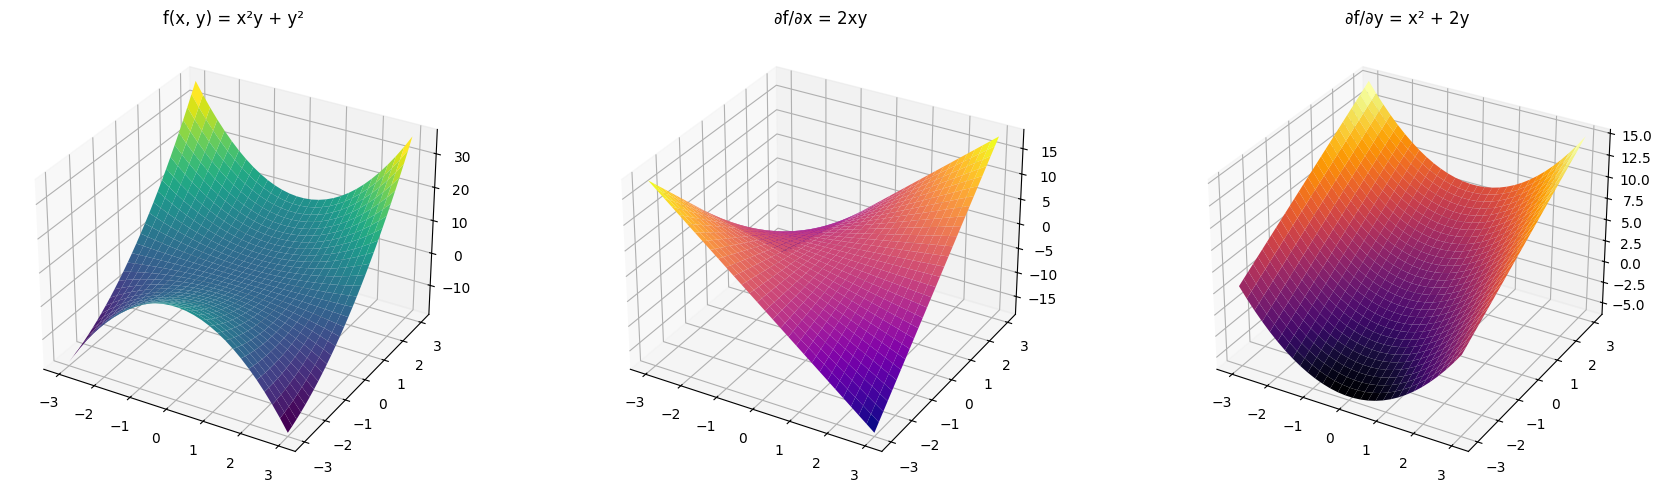

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Hàm f(x, y) = x^2 * y + y^2
def f(x, y):
    return x**2 * y + y**2

# Đạo hàm riêng theo x: ∂f/∂x = 2xy
def dfdx(x, y):
    return 2 * x * y

# Đạo hàm riêng theo y: ∂f/∂y = x^2 + 2y
def dfdy(x, y):
    return x**2 + 2 * y

x = np.linspace(-3, 3, 30)
y = np.linspace(-3, 3, 30)
X, Y = np.meshgrid(x, y)

Z = f(X, Y)
dZ_dx = dfdx(X, Y)
dZ_dy = dfdy(X, Y)

fig = plt.figure(figsize=(18, 5))

# Đồ thị hàm gốc
ax1 = fig.add_subplot(1, 3, 1, projection='3d')
ax1.plot_surface(X, Y, Z, cmap='viridis')
ax1.set_title('f(x, y) = x²y + y²')

# Đồ thị đạo hàm riêng theo x
ax2 = fig.add_subplot(1, 3, 2, projection='3d')
ax2.plot_surface(X, Y, dZ_dx, cmap='plasma')
ax2.set_title('∂f/∂x = 2xy')

# Đồ thị đạo hàm riêng theo y
ax3 = fig.add_subplot(1, 3, 3, projection='3d')
ax3.plot_surface(X, Y, dZ_dy, cmap='inferno')
ax3.set_title('∂f/∂y = x² + 2y')

plt.tight_layout()
plt.show()